#                                               PROJECT PART 3 - TEAM 7
                                                
##                                 Members: Gauri Mhetre, Rohit Nagotkar, Dnyandeep Dhok                                                   


In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_810/3774073834.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Combining all the csv files

In [39]:
df_dir = "./raw_data/"
raw_csv = [f for f in os.listdir(df_dir) if f.endswith('.csv')]
print(f"list of all csv files {raw_csv}")
dfs = []

for csv in raw_csv[:2]:
    df = pd.read_csv(os.path.join(df_dir, csv))
    dfs.append(df)
main_df = pd.concat(dfs, ignore_index=True)
main_df.head()

list of all csv files ['dataset-of-90s.csv', 'dataset-of-80s.csv', 'dataset-of-00s.csv', 'dataset-of-60s.csv', 'dataset-of-10s.csv', 'dataset-of-70s.csv']


track           artist  \
0                                     Misty Roses  Astrud Gilberto   
1                                      Never Ever       All Saints   
2                                     Soul Sermon    Gregg Karukas   
3                       Clarinet Marmalade - Live    Alton Purnell   
4  До смерті і довше - Drum & Base and Rock Remix         Skryabin   

                                    uri  danceability  energy  key  loudness  \
0  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm         0.527   0.316    1   -15.769   
1  spotify:track:5FTz9qQ94PyUHETyAyfYZN         0.738   0.541    1    -5.485   
2  spotify:track:6m24oe3lk1UMxq9zq4iPFi         0.736   0.419    0   -10.662   
3  spotify:track:5FOXuiLI6knVtgMUjWKj6x         0.565   0.594    5   -13.086   
4  spotify:track:6CxyIPTqSPvAPXfrIZczs4         0.513   0.760    4   -10.077   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0310      0.693000           0.00699    0.1680    0.543   
1     1       0.0311      0.559000           0.00000    0.0492    0.309   
2     1       0.0300      0.693000           0.49500    0.0809    0.265   
3     1       0.0646      0.655000           0.92600    0.6750    0.763   
4     1       0.0355      0.000017           0.00339    0.1530    0.961   

     tempo  duration_ms  time_signature  chorus_hit  sections  target  
0  116.211       158840               4    53.89523         6       0  
1  134.187       387573               4    32.16853        16       1  
2   93.982       237267               4    42.05369         9       0  
3  114.219       375933               4    80.99693        10       0  
4  153.166       430653               4    25.57331        20       0

# Data understanding

In [40]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12428 entries, 0 to 12427
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             12428 non-null  object 
 1   artist            12428 non-null  object 
 2   uri               12428 non-null  object 
 3   danceability      12428 non-null  float64
 4   energy            12428 non-null  float64
 5   key               12428 non-null  int64  
 6   loudness          12428 non-null  float64
 7   mode              12428 non-null  int64  
 8   speechiness       12428 non-null  float64
 9   acousticness      12428 non-null  float64
 10  instrumentalness  12428 non-null  float64
 11  liveness          12428 non-null  float64
 12  valence           12428 non-null  float64
 13  tempo             12428 non-null  float64
 14  duration_ms       12428 non-null  int64  
 15  time_signature    12428 non-null  int64  
 16  chorus_hit        12428 non-null  float6

## Description of numerical values

In [41]:
main_df.describe()

danceability        energy           key      loudness          mode  \
count  12428.000000  12428.000000  12428.000000  12428.000000  12428.000000   
mean       0.565428      0.605465      5.246540    -10.683555      0.679594   
std        0.176357      0.247110      3.559251      4.895861      0.466651   
min        0.057600      0.000276      0.000000    -49.253000      0.000000   
25%        0.454000      0.435000      2.000000    -13.044250      0.000000   
50%        0.584000      0.636000      5.000000     -9.899500      1.000000   
75%        0.694000      0.810000      9.000000     -7.242500      1.000000   
max        0.988000      1.000000     11.000000     -0.683000      1.000000   

        speechiness  acousticness  instrumentalness      liveness  \
count  12428.000000  12428.000000      12428.000000  12428.000000   
mean       0.065053      0.292246          0.148756      0.199318   
std        0.070024      0.312754          0.295633      0.178552   
min        0.022000      0.000000          0.000000      0.013000   
25%        0.032900      0.026200          0.000002      0.087300   
50%        0.041600      0.159000          0.000284      0.129000   
75%        0.063400      0.508000          0.059825      0.262000   
max        0.950000      0.996000          1.000000      0.997000   

            valence         tempo   duration_ms  time_signature    chorus_hit  \
count  12428.000000  12428.000000  1.242800e+04    12428.000000  12428.000000   
mean       0.565609    119.846024  2.554025e+05        3.924606     40.307788   
std        0.262174     28.203842  1.056132e+05        0.354801     19.507140   
min        0.000000     34.535000  1.953300e+04        1.000000      0.000000   
25%        0.358000     99.287250  2.037600e+05        4.000000     27.720345   
50%        0.592000    117.962000  2.438000e+05        4.000000     35.963955   
75%        0.784000    135.528500  2.885102e+05        4.000000     47.935875   
max        0.996000    217.943000  2.223827e+06        5.000000    433.182000   

           sections       target  
count  12428.000000  12428.00000  
mean      11.211297      0.50000  
std        4.478278      0.50002  
min        1.000000      0.00000  
25%        9.000000      0.00000  
50%       11.000000      0.50000  
75%       13.000000      1.00000  
max       73.000000      1.00000

## Mean, Median, Mode of all columns

In [42]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"The mean value for {col} is {main_df[col].mean()}")
        print(f"The median value for {col} is {main_df[col].median()}")
        print(f"The mode value for {col} is {main_df[col].mode()[0]}")
        print("-----------------------------------------------------------")
        

The mean value for danceability is 0.56542849211458
The median value for danceability is 0.584
The mode value for danceability is 0.652
-----------------------------------------------------------
The mean value for energy is 0.6054650803830061
The median value for energy is 0.636
The mode value for energy is 0.727
-----------------------------------------------------------
The mean value for key is 5.246540070807853
The median value for key is 5.0
The mode value for key is 0
-----------------------------------------------------------
The mean value for loudness is -10.683554956549726
The median value for loudness is -9.8995
The mode value for loudness is -9.15
-----------------------------------------------------------
The mean value for mode is 0.6795944641132926
The median value for mode is 1.0
The mode value for mode is 1
-----------------------------------------------------------
The mean value for speechiness is 0.06505259092372064
The median value for speechiness is 0.0416
The mo

## Count of null values

In [43]:
main_df.isnull().sum()

track               0
artist              0
uri                 0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
chorus_hit          0
sections            0
target              0
dtype: int64

In [44]:
for col in main_df.columns:
    if main_df[col].dtype!="object":
        print(f"Range of {col} is {main_df[col].max() - main_df[col].min()}")
        print(f"Max & Min of {col} is {main_df[col].max()}, {main_df[col].min()}")
        print("--------------------")

Range of danceability is 0.9304
Max & Min of danceability is 0.988, 0.0576
--------------------
Range of energy is 0.999724
Max & Min of energy is 1.0, 0.000276
--------------------
Range of key is 11
Max & Min of key is 11, 0
--------------------
Range of loudness is 48.57
Max & Min of loudness is -0.683, -49.253
--------------------
Range of mode is 1
Max & Min of mode is 1, 0
--------------------
Range of speechiness is 0.9279999999999999
Max & Min of speechiness is 0.95, 0.022
--------------------
Range of acousticness is 0.996
Max & Min of acousticness is 0.996, 0.0
--------------------
Range of instrumentalness is 1.0
Max & Min of instrumentalness is 1.0, 0.0
--------------------
Range of liveness is 0.984
Max & Min of liveness is 0.997, 0.013
--------------------
Range of valence is 0.996
Max & Min of valence is 0.996, 0.0
--------------------
Range of tempo is 183.40800000000002
Max & Min of tempo is 217.943, 34.535
--------------------
Range of duration_ms is 2204294
Max & Min

In [45]:
main_df["key"].value_counts()

key
0     1558
7     1528
9     1476
2     1415
5     1065
4     1027
1      971
11     921
10     774
6      685
8      597
3      411
Name: count, dtype: int64

In [46]:
main_df.columns

Index(['track', 'artist', 'uri', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target'],
      dtype='object')

# Exploratory Data Analysis

## Histogram to see distribution of data


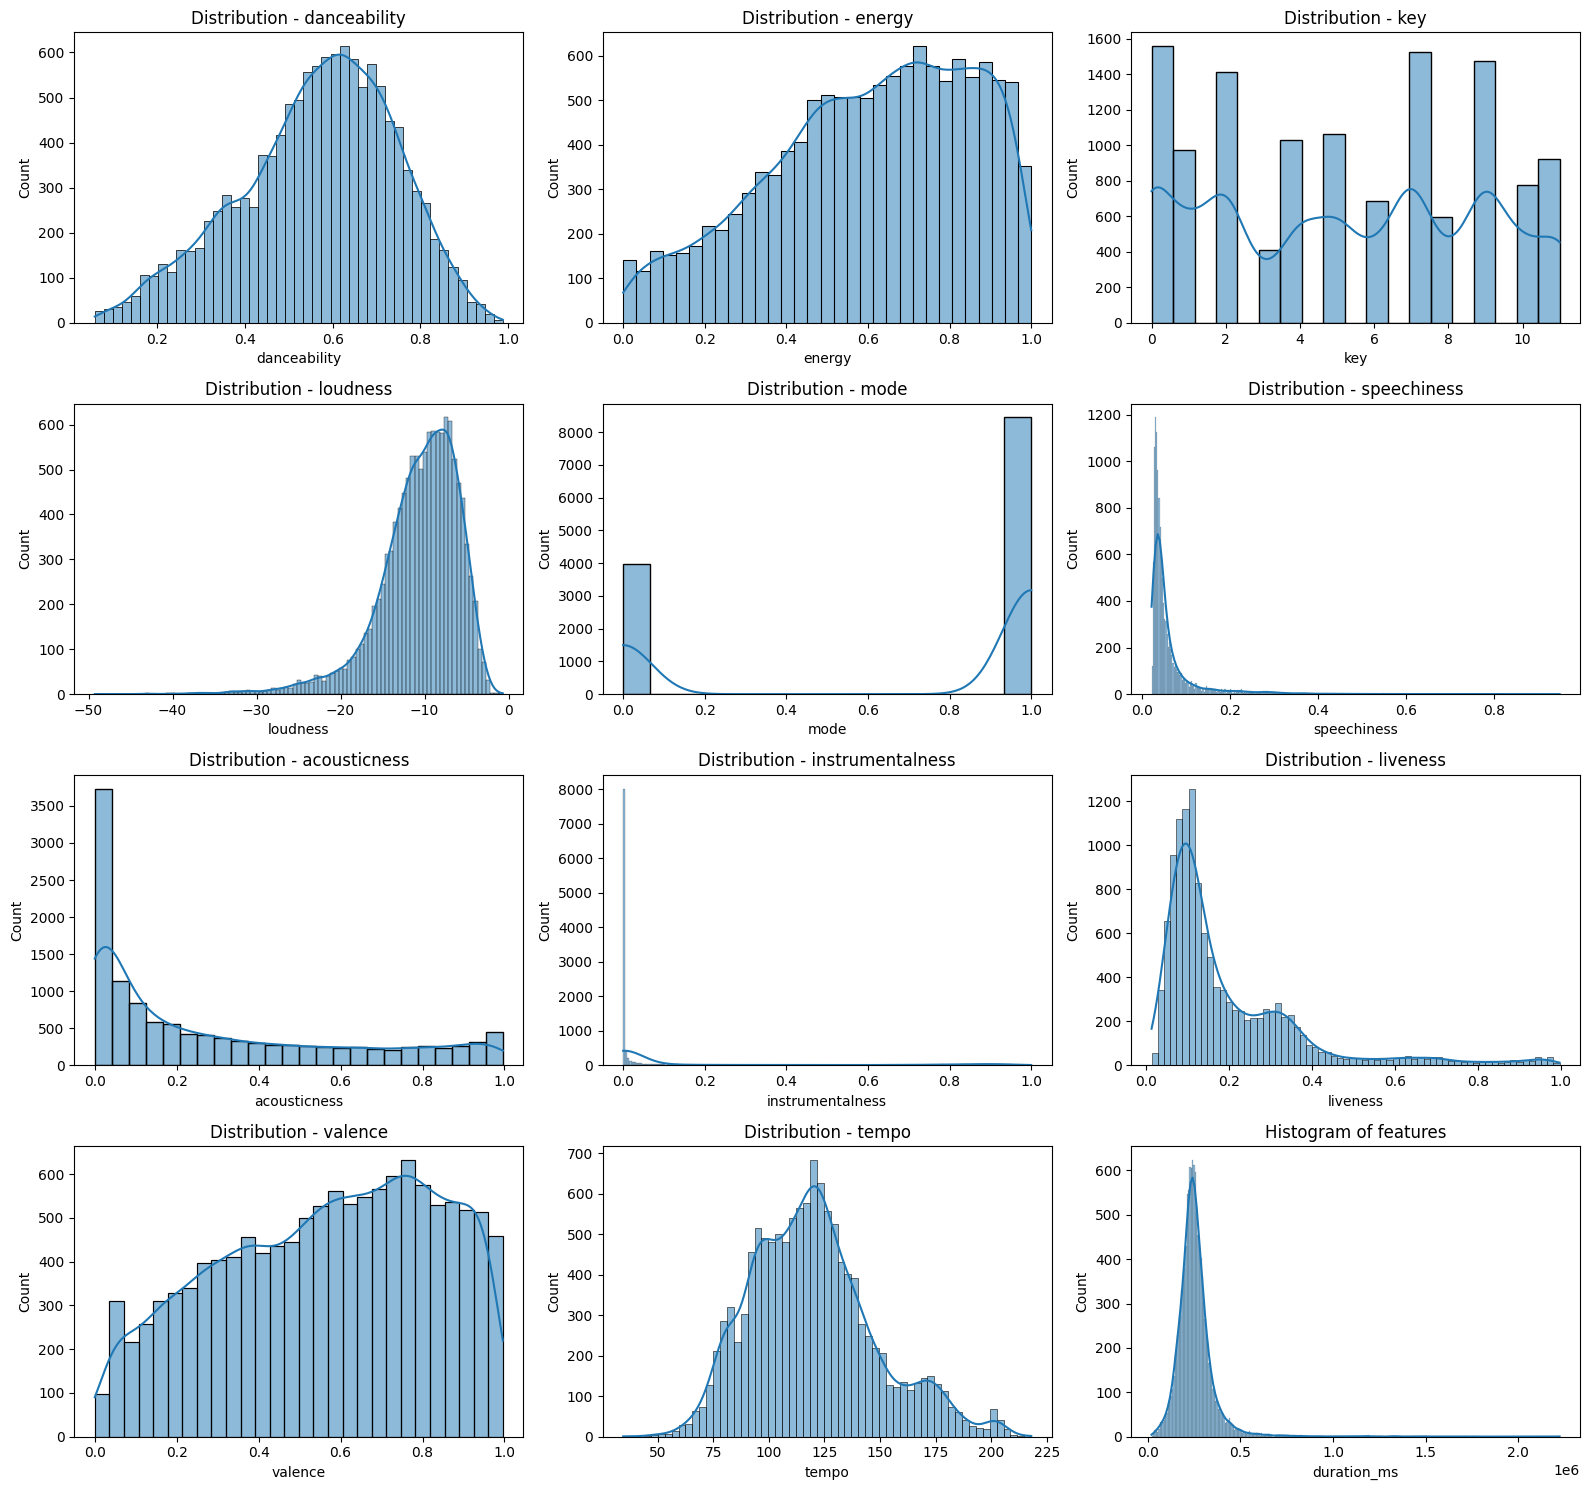

In [47]:
eda_columns = [['danceability', 'energy', 'key'],['loudness',
       'mode', 'speechiness'], ['acousticness', 'instrumentalness', 'liveness'],
       ['valence', 'tempo', 'duration_ms']]
fig, axs = plt.subplots(4, 3, figsize=(16, 15))

for row in range(4):
    for col in range(3):
        sns.histplot(main_df[eda_columns[row][col]], kde=True, ax=axs[row, col])
        axs[row, col].set_title(f"Distribution - {eda_columns[row][col]}")
plt.title("Histogram of features")
plt.tight_layout()
plt.show()

Danceability: The distribution appears to be slightly skewed to the right, with most tracks having a danceability value between 0.4 and 0.8 also there are a few tracks with very high danceability values (>0.9).

Energy: The distribution is roughly normal, with most tracks having an energy value between 0.4 and 0.8 also there are a few tracks with very high and very low energy values.

Key: The distribution appears to be fairly uniform, suggesting no particular key is dominant in the dataset. However, there are some spikes at certain key values, indicating a slight preference for those keys.

Loudness: The distribution is skewed to the right, with most tracks having a loudness value between -20 and -5 dB. There are a few tracks that are significantly louder than the majority.

Speechiness: The distribution is skewed to the left, with most tracks having a speechiness value close to 0.0. There are a few tracks with significant speech content (>0.4).

Acousticness: The distribution is roughly normal, with most tracks having an acousticness value between 0.4 and 0.8. There are a few tracks at both ends of the spectrum, with some being very electronic and others being very acoustic.

Instrumentalness: The distribution is skewed to the right, with most tracks having some level of vocals (instrumentalness < 0.8). There are a few tracks that are completely instrumental.

Liveness: The distribution is skewed to the left, with most tracks having a liveness value between 0.1 and 0.4. There are a few tracks at both ends of the spectrum, with some sounding very much like studio recordings and others sounding more like live performances.

Valence: The distribution is normal, with most tracks having a positive valence value (>0.5).

Tempo: The distribution is normal, with most tracks having a tempo value of 80 to 130.

/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

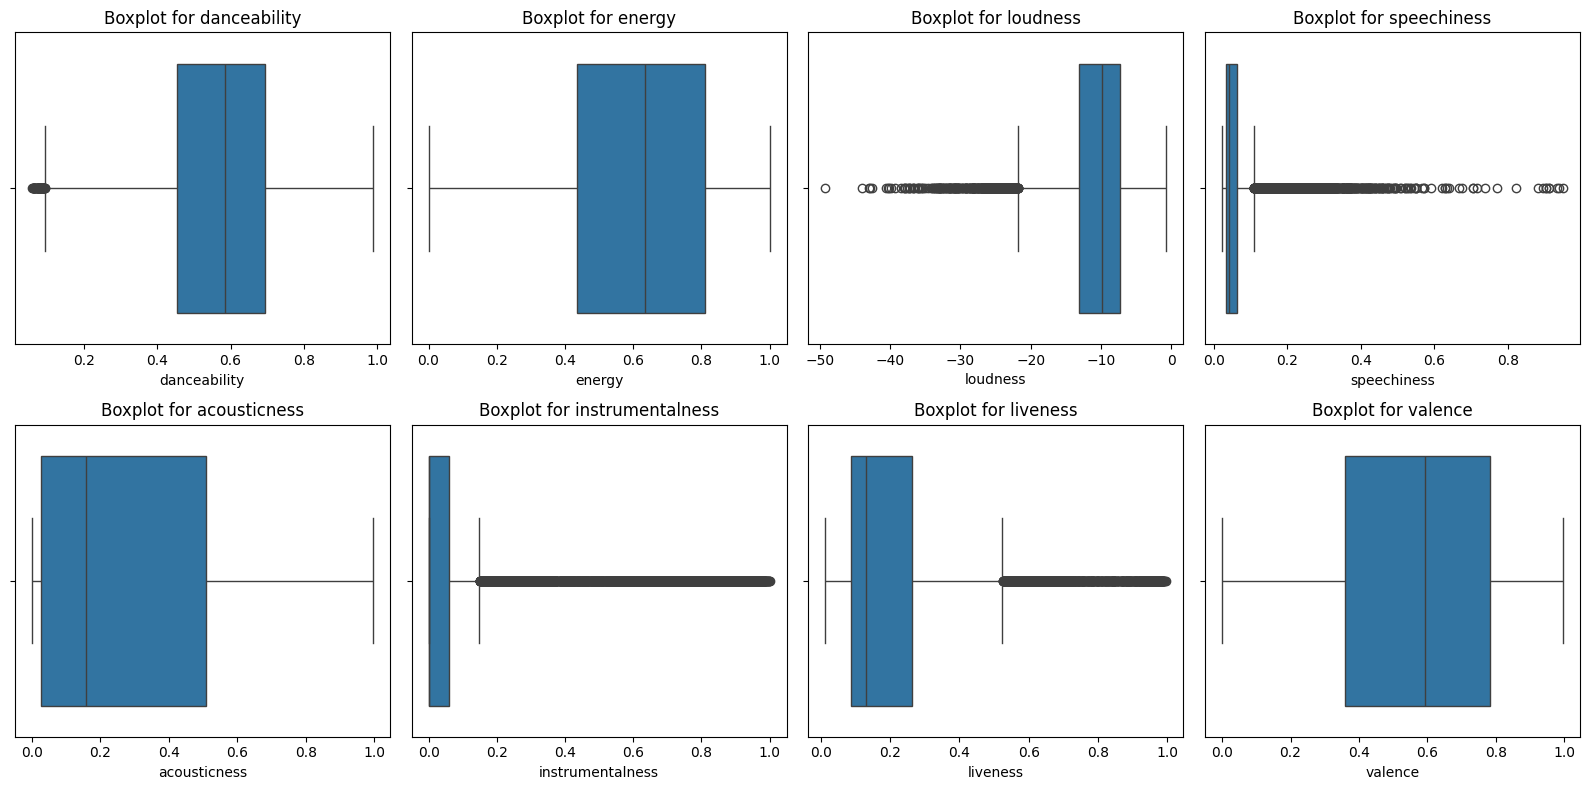

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
axes = axes.flatten()

attributes = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

for i, col in enumerate(attributes):
    sns.boxplot(x=main_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")


plt.tight_layout()
plt.show()

Danceability, energy, and valence: Tend to be higher than average, suggesting a preference for music that is danceable, energetic, and positive.

Loudness: Generally quieter than industry standards, although there's a peak around -8.14 dB. Also, a lot of outliers in these column.

Acousticness: Mix of acoustic and electronic music, with a slight lean towards electronic but also a significant presence of fully acoustic tracks.

Speechiness and instrumentalness: Very low values, indicating mostly instrumental tracks with minimal spoken word content. Also there are a lot of outliers in these columns.

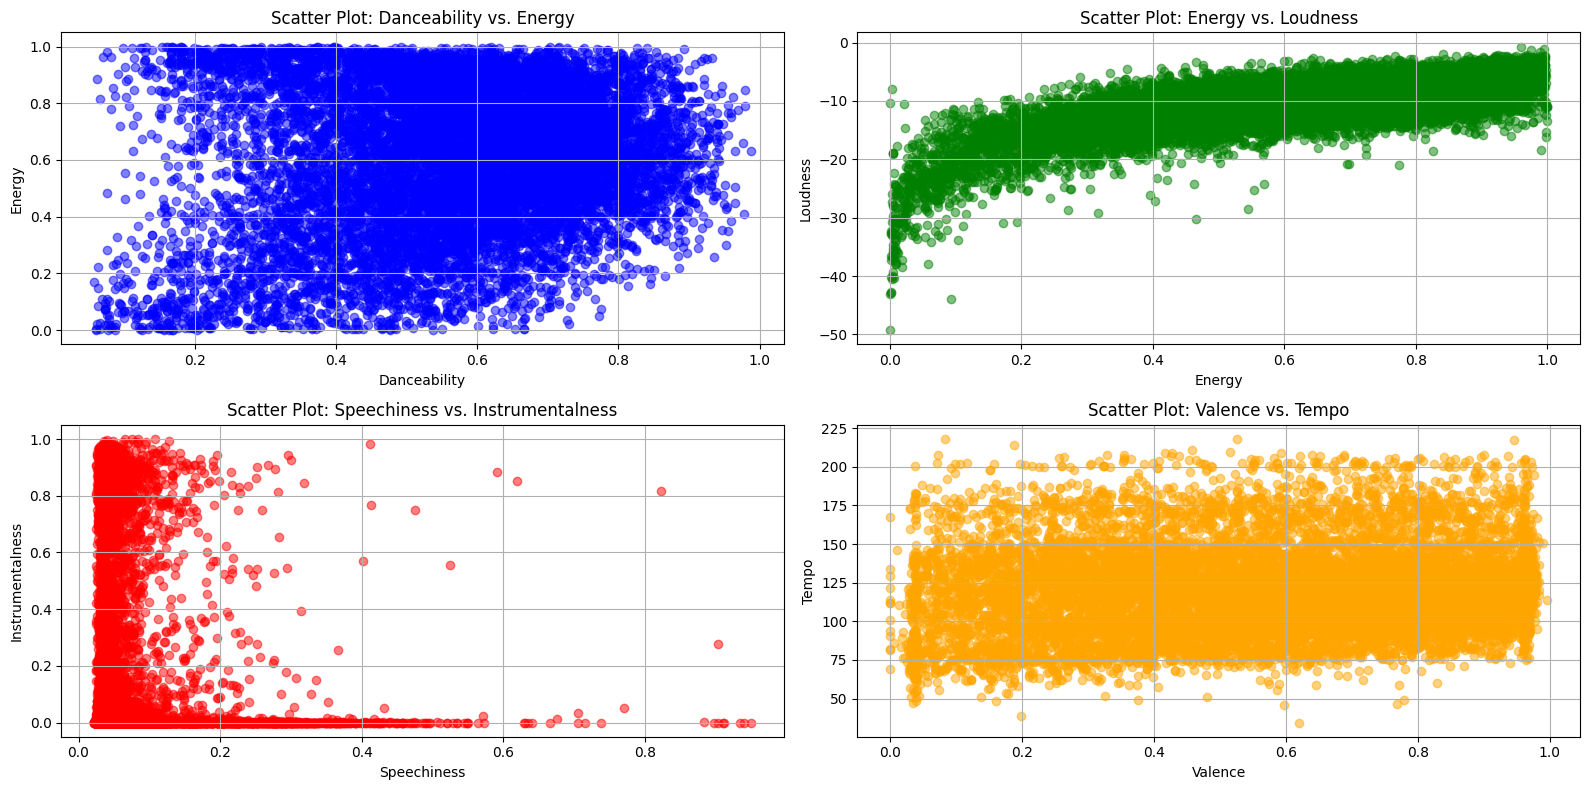

In [49]:
scatter_pairs = [('danceability', 'energy', 'blue'),
                 ('energy', 'loudness', 'green'),
                 ('speechiness', 'instrumentalness', 'red'),
                 ('valence', 'tempo', 'orange')]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8))
axes = axes.flatten()

for i, pair in enumerate(scatter_pairs):
    x_attr, y_attr, color = pair
    
    axes[i].scatter(main_df[x_attr], main_df[y_attr], color=color, alpha=0.5)
    axes[i].set_title(f'Scatter Plot: {x_attr.capitalize()} vs. {y_attr.capitalize()}')
    axes[i].set_xlabel(x_attr.capitalize())
    axes[i].set_ylabel(y_attr.capitalize())
    axes[i].grid(True)

plt.tight_layout()
plt.show()

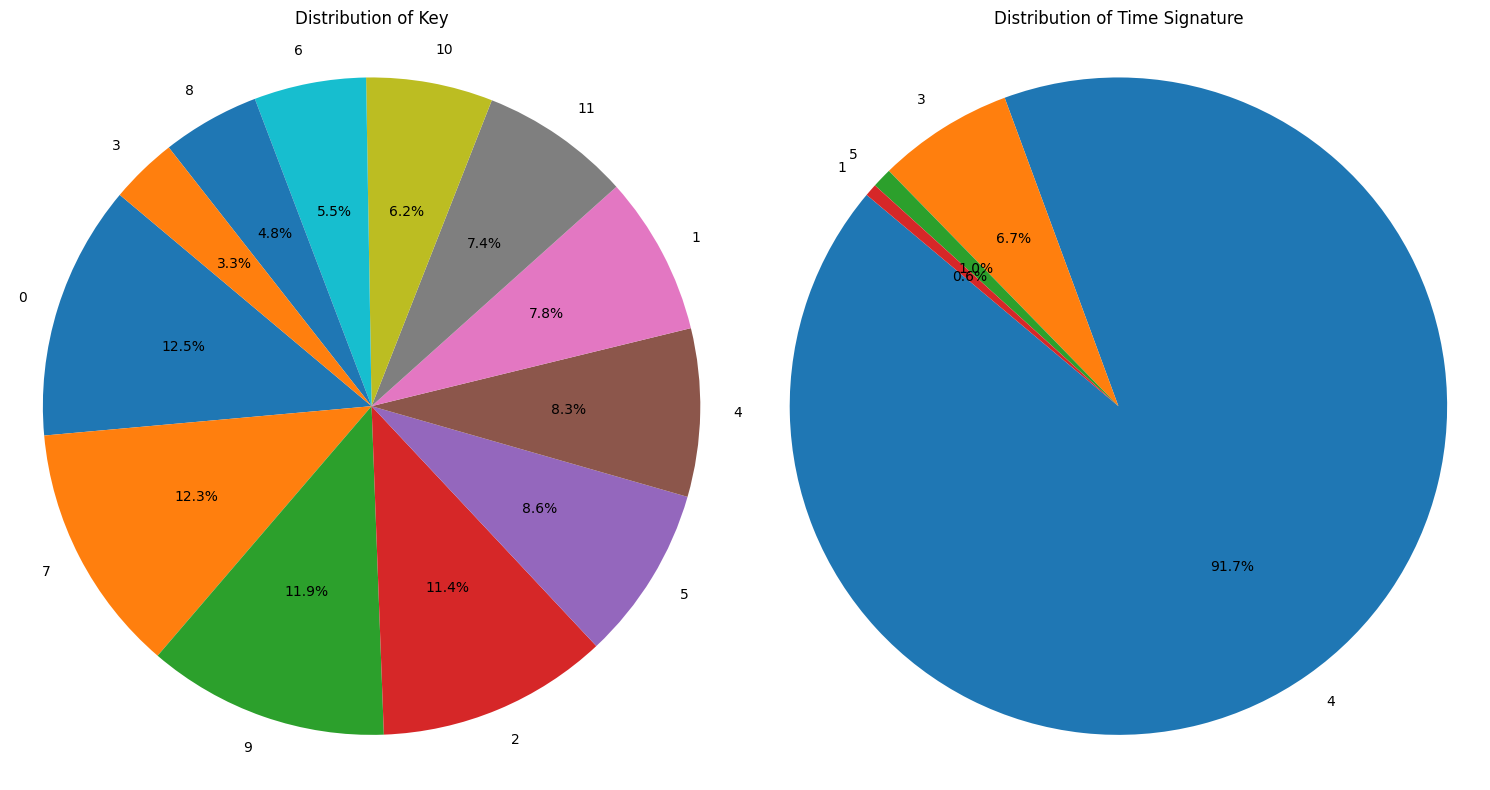

In [50]:
key_counts = main_df['key'].value_counts()
time_signature_counts = main_df['time_signature'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))

axes[0].pie(key_counts, labels=key_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Distribution of Key')
axes[0].axis('equal')  

axes[1].pie(time_signature_counts, labels=time_signature_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Distribution of Time Signature')
axes[1].axis('equal')  

fig.patch.set_facecolor('white')

plt.tight_layout()
plt.show()


We can see an overall even distribution of all the key pitches in the first chart and on the second chart 88.3% tracks has 4 beats per second which is also known as the common time.

## Pair plot for song variables

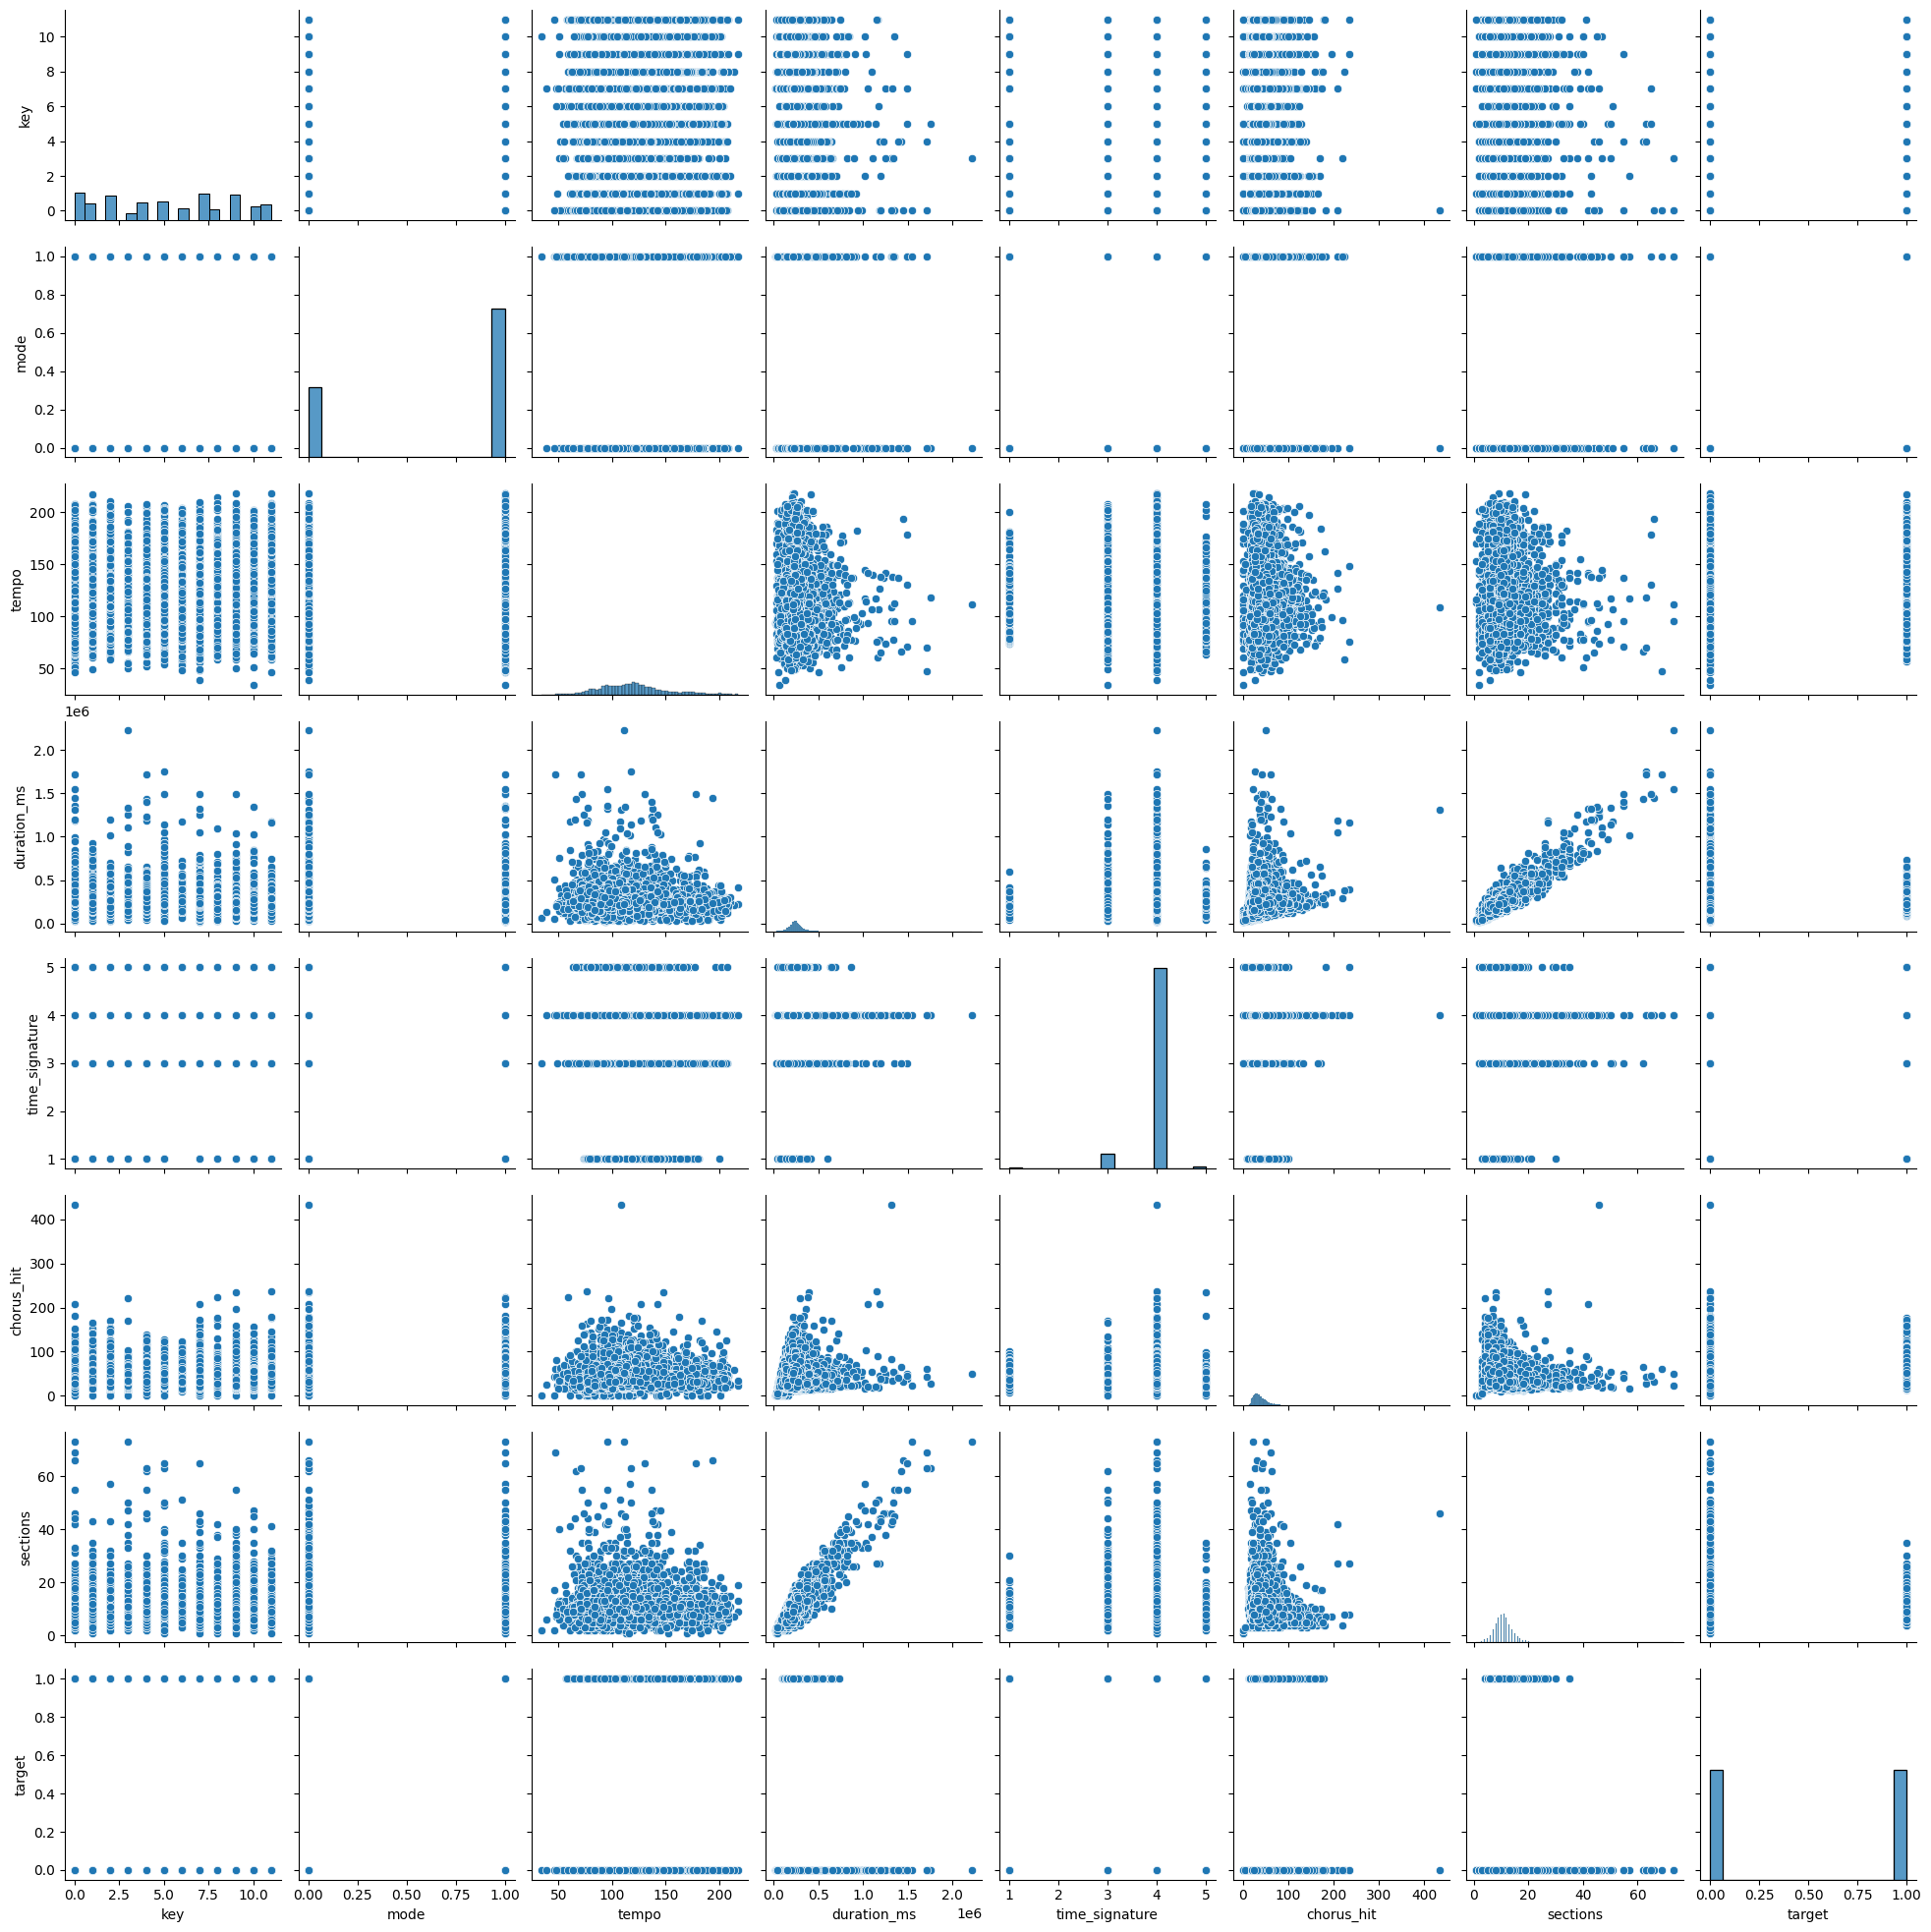

In [51]:
sns.pairplot(main_df[['track', 'artist', 'uri', 'key', 
       'mode','tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']])
plt.show()

We can observe a good positive relation between sections and duration_ms

## Pair plot for the meta variables 

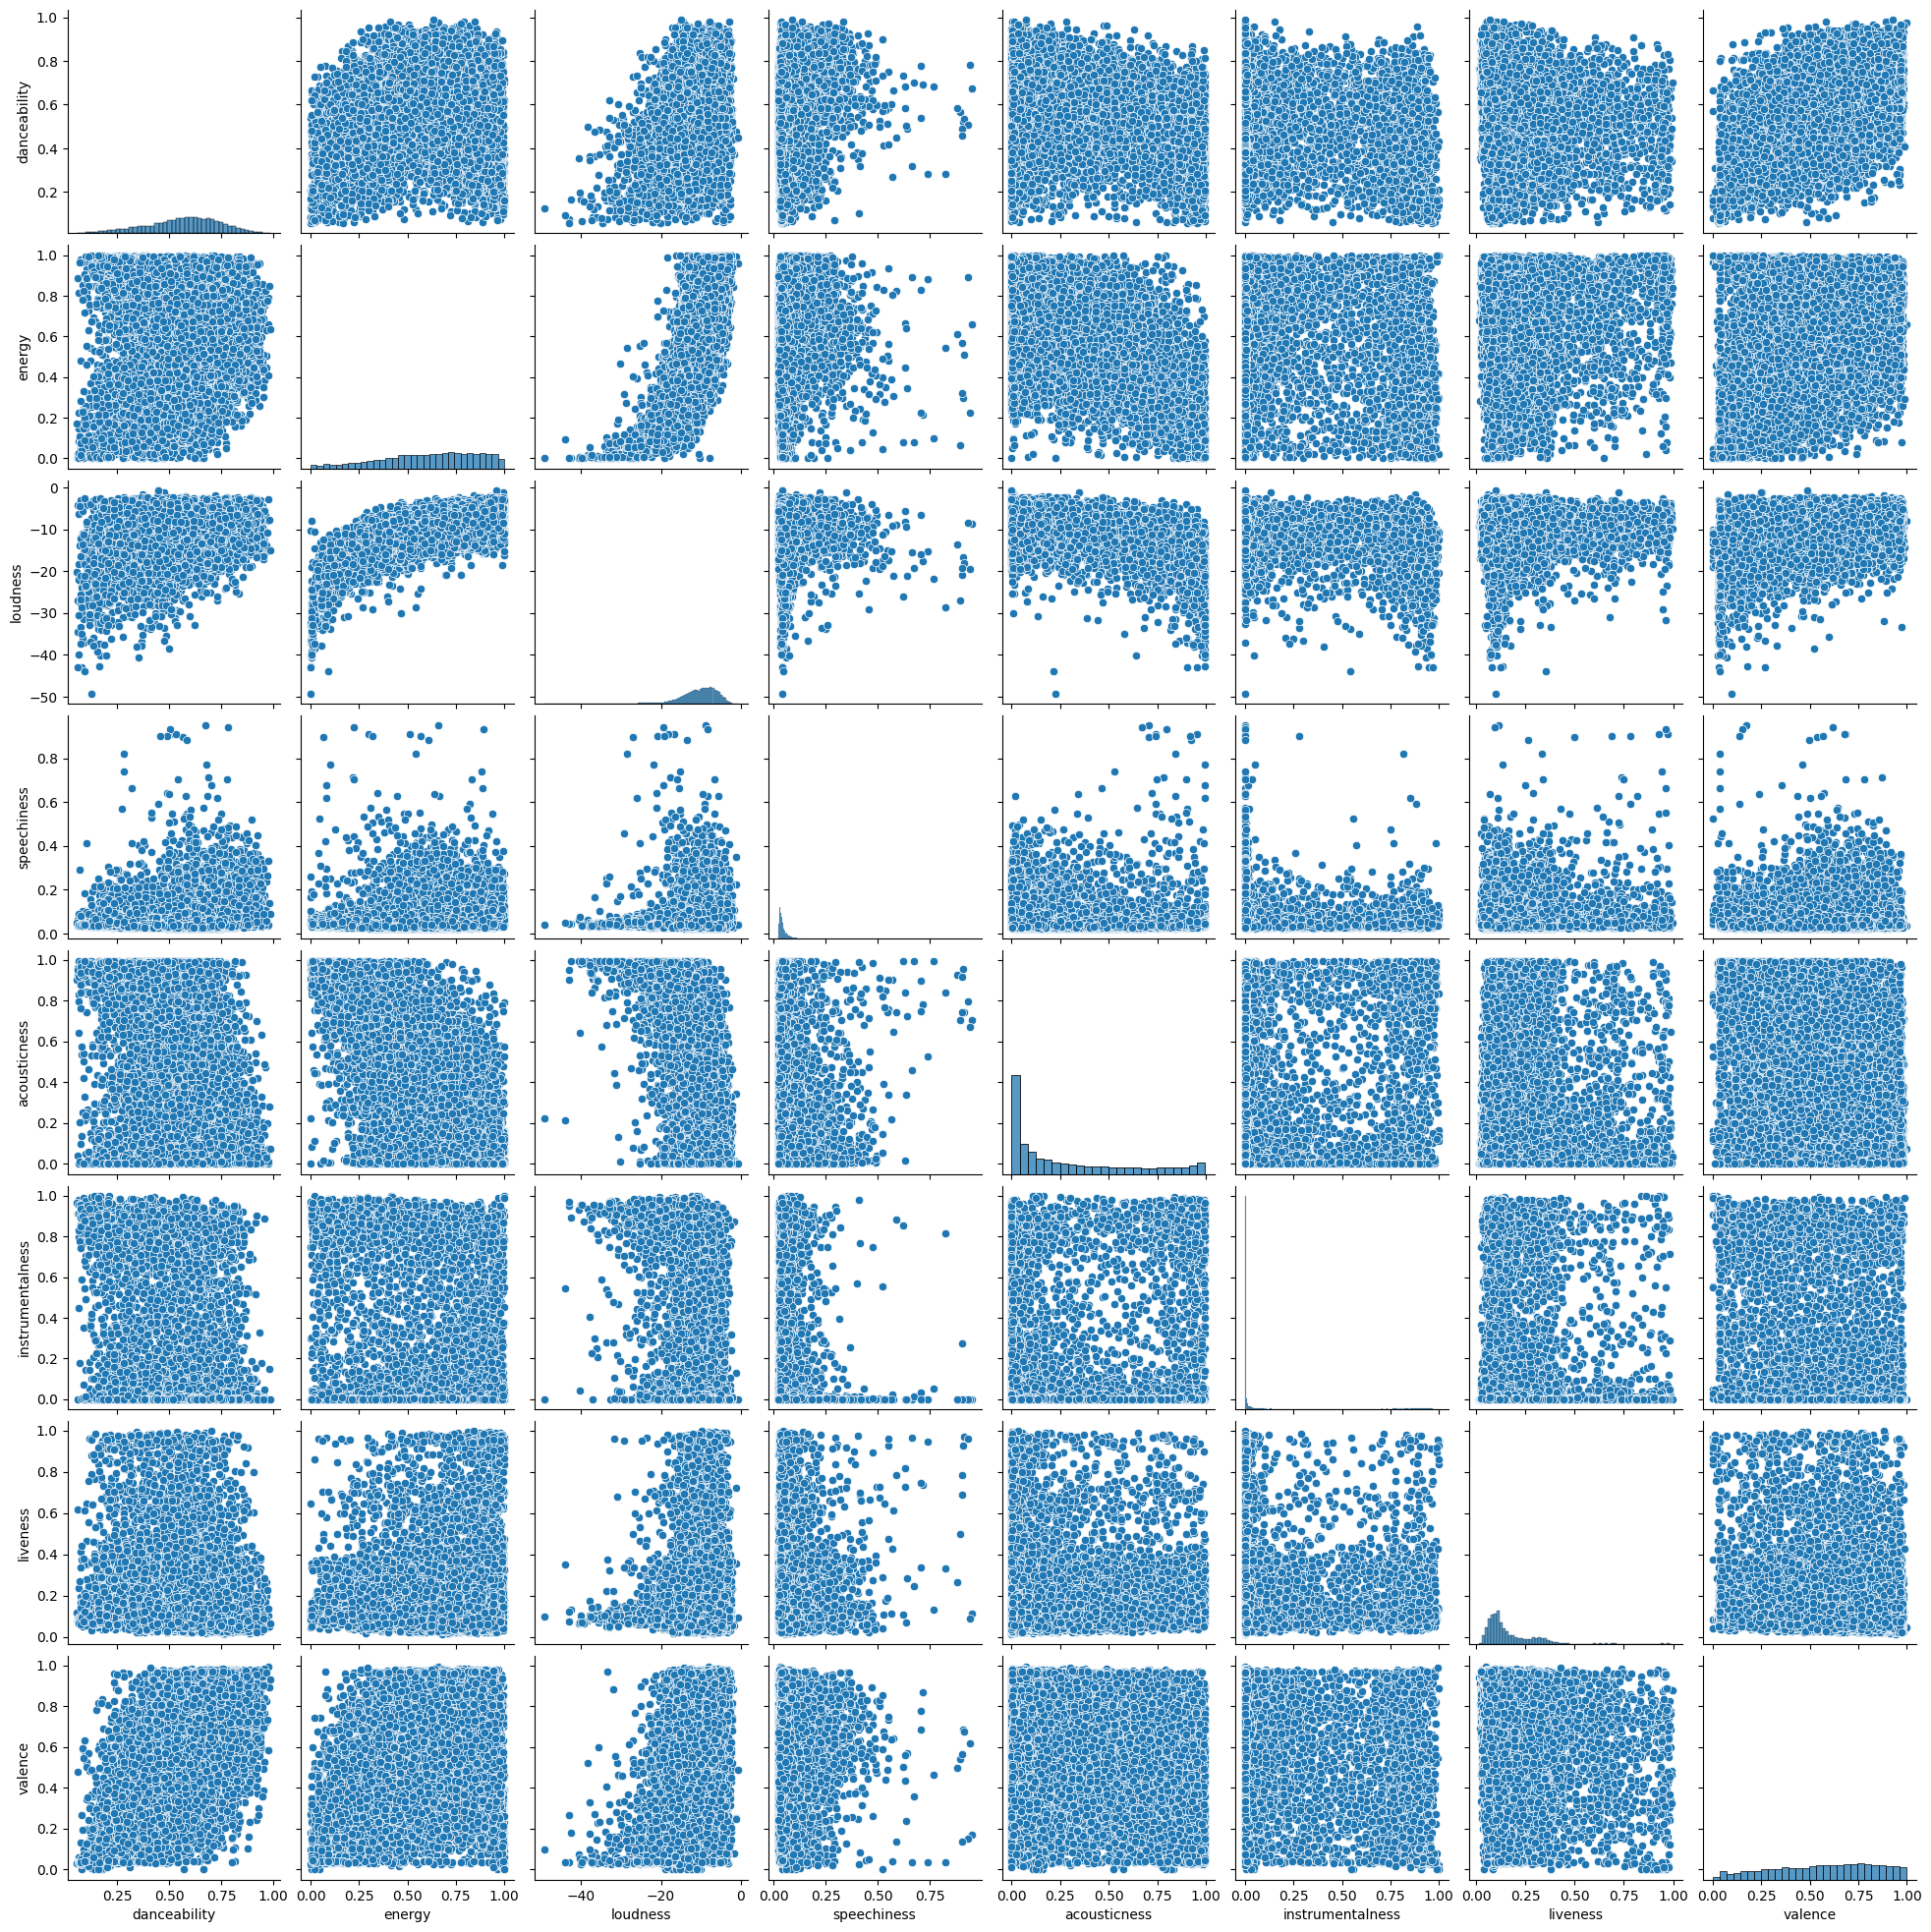

In [52]:
sns.pairplot(main_df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness','valence']])
plt.show()

## Correlation

In [53]:
corr = main_df[[ 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target']].corr(method='pearson')
corr

danceability    energy       key  loudness      mode  \
danceability          1.000000  0.150144  0.027069  0.224172 -0.068320   
energy                0.150144  1.000000  0.031482  0.748964 -0.026166   
key                   0.027069  0.031482  1.000000  0.020082 -0.175446   
loudness              0.224172  0.748964  0.020082  1.000000  0.008682   
mode                 -0.068320 -0.026166 -0.175446  0.008682  1.000000   
speechiness           0.136343  0.120588  0.015382  0.056215 -0.053289   
acousticness         -0.230659 -0.689298 -0.034086 -0.527057  0.024657   
instrumentalness     -0.321268 -0.200402 -0.020518 -0.357387 -0.053692   
liveness             -0.133819  0.182114 -0.010605  0.092916  0.002961   
valence               0.578726  0.371588  0.021348  0.292502 -0.009117   
tempo                -0.126644  0.189933 -0.017080  0.127166  0.030256   
duration_ms          -0.016347 -0.055674  0.005125 -0.095697 -0.076763   
time_signature        0.182807  0.174232  0.005544  0.153917 -0.006911   
chorus_hit           -0.027050  0.005132  0.026403 -0.006441 -0.028309   
sections             -0.023430 -0.102180 -0.003637 -0.129661 -0.060555   
target                0.395914  0.200605  0.032193  0.287654  0.016554   

                  speechiness  acousticness  instrumentalness  liveness  \
danceability         0.136343     -0.230659         -0.321268 -0.133819   
energy               0.120588     -0.689298         -0.200402  0.182114   
key                  0.015382     -0.034086         -0.020518 -0.010605   
loudness             0.056215     -0.527057         -0.357387  0.092916   
mode                -0.053289      0.024657         -0.053692  0.002961   
speechiness          1.000000     -0.068721         -0.051732  0.145925   
acousticness        -0.068721      1.000000          0.234517 -0.053011   
instrumentalness    -0.051732      0.234517          1.000000 -0.010736   
liveness             0.145925     -0.053011         -0.010736  1.000000   
valence              0.022959     -0.268081         -0.265272 -0.028778   
tempo               -0.001731     -0.142860         -0.032932  0.025825   
duration_ms         -0.014157      0.000256          0.060105  0.004702   
time_signature       0.010711     -0.167749         -0.111682 -0.002389   
chorus_hit           0.019802      0.000562          0.043305  0.056951   
sections            -0.034370      0.050593          0.045524 -0.028307   
target              -0.063110     -0.330123         -0.404934 -0.101645   

                   valence     tempo  duration_ms  time_signature  chorus_hit  \
danceability      0.578726 -0.126644    -0.016347        0.182807   -0.027050   
energy            0.371588  0.189933    -0.055674        0.174232    0.005132   
key               0.021348 -0.017080     0.005125        0.005544    0.026403   
loudness          0.292502  0.127166    -0.095697        0.153917   -0.006441   
mode             -0.009117  0.030256    -0.076763       -0.006911   -0.028309   
speechiness       0.022959 -0.001731    -0.014157        0.010711    0.019802   
acousticness     -0.268081 -0.142860     0.000256       -0.167749    0.000562   
instrumentalness -0.265272 -0.032932     0.060105       -0.111682    0.043305   
liveness         -0.028778  0.025825     0.004702       -0.002389    0.056951   
valence           1.000000  0.109281    -0.148719        0.167137   -0.047150   
tempo             0.109281  1.000000    -0.066669        0.002908   -0.063536   
duration_ms      -0.148719 -0.066669     1.000000        0.005717    0.099882   
time_signature    0.167137  0.002908     0.005717        1.000000   -0.005152   
chorus_hit       -0.047150 -0.063536     0.099882       -0.005152    1.000000   
sections         -0.117574  0.003995     0.870978       -0.006179   -0.110155   
target            0.221018  0.007731     0.044138        0.121788   -0.035656   

                  sections    target  
danceability     -0.023430  0.395914  
energy           -0.102180 

As we observed in the Pairplot above, section and duration_ms has a good positive correlation value of 0.88

/var/folders/ts/_c96jtzn74l3twms5892d8sr0000gn/T/ipykernel_810/2844571938.py:7: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


<Figure size 1800x1000 with 0 Axes>

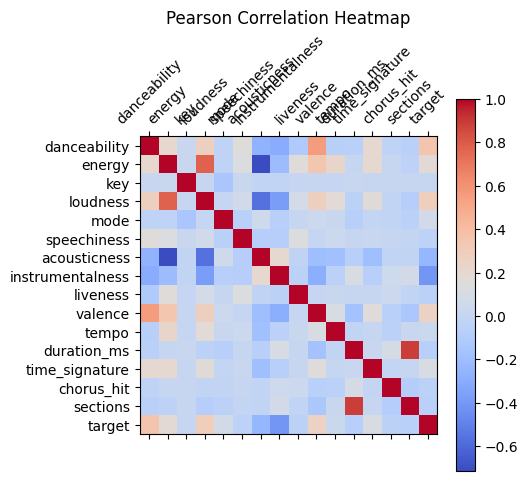

In [29]:
fig = plt.figure(figsize=(18,10))
plt.matshow(corr, cmap='coolwarm')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.colorbar()
plt.title("Pearson Correlation Heatmap")
fig.show()

The same correlation can be observed here.

## Reflection: 
We combined all the 6 csv files, it didn't contained any null values but some columns contained a lot of outliers. The summary statistics provide valuable insights into key attributes of the dataset. Danceability and energy exhibit symmetric distributions, with mean and median values close to each other, indicating a balanced spread of scores. Songs generally exhibit low speechiness, as reflected by a mean of 0.073 and a mode of 0.0331. Acousticness shows moderate prevalence, with a mean of 0.364 and a mode of 0.995 indicating high acoustic content. Valence leans towards positivity, with a mean of 0.542 and a mode of 0.961 indicating highly positive valence. The equal distribution of target classes around 0.5 suggests a balanced dataset with an equal number of hit and non-hit songs. The plots gave us a good insights on the dataset, histograms provided us with the distributions of the columns, boxplots compliment our finding from the statistical analysis, and from the pairplot, heatmap and correlation values we can infer that section and duration are the most correlated attributes.


## Difficulties: 
Interpreting correlation, while relationships between variables can be found through correlation analysis, it's important to keep in mind that correlation does not suggest connection. So, even if we get a high correlation value it doesn't mean there is some connection between them.
Plotting Pairplots, Plotting 19 features and analyzing them is bit confusing, thatswhy we plotted two pairplots wuth half-half features.

### Observations
- mode is 0 or 1
- key is 0 to 11

## Remove Outliers

In [54]:
numerical_features = main_df.select_dtypes(include=['float64', 'int64']).columns
categorical_features = main_df.select_dtypes(include=['object']).columns

# Exclude the target variable from numerical features
numerical_features = [col for col in numerical_features if col != 'target']

# Set the IQR threshold for outlier detection
iqr_threshold = 1.5

# Remove outliers from each numerical column
for column in numerical_features:
    # Calculate the first and third quartiles
    Q1 = main_df[column].quantile(0.25)
    Q3 = main_df[column].quantile(0.75)
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - iqr_threshold * IQR
    upper_bound = Q3 + iqr_threshold * IQR
    
    # Remove outliers from the column
    main_df = main_df[(main_df[column] >= lower_bound) & (main_df[column] <= upper_bound)]


/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/Users/rohitnagotkar/CPSC 5310 ML/ML_course/lib/python3.11/site-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of p

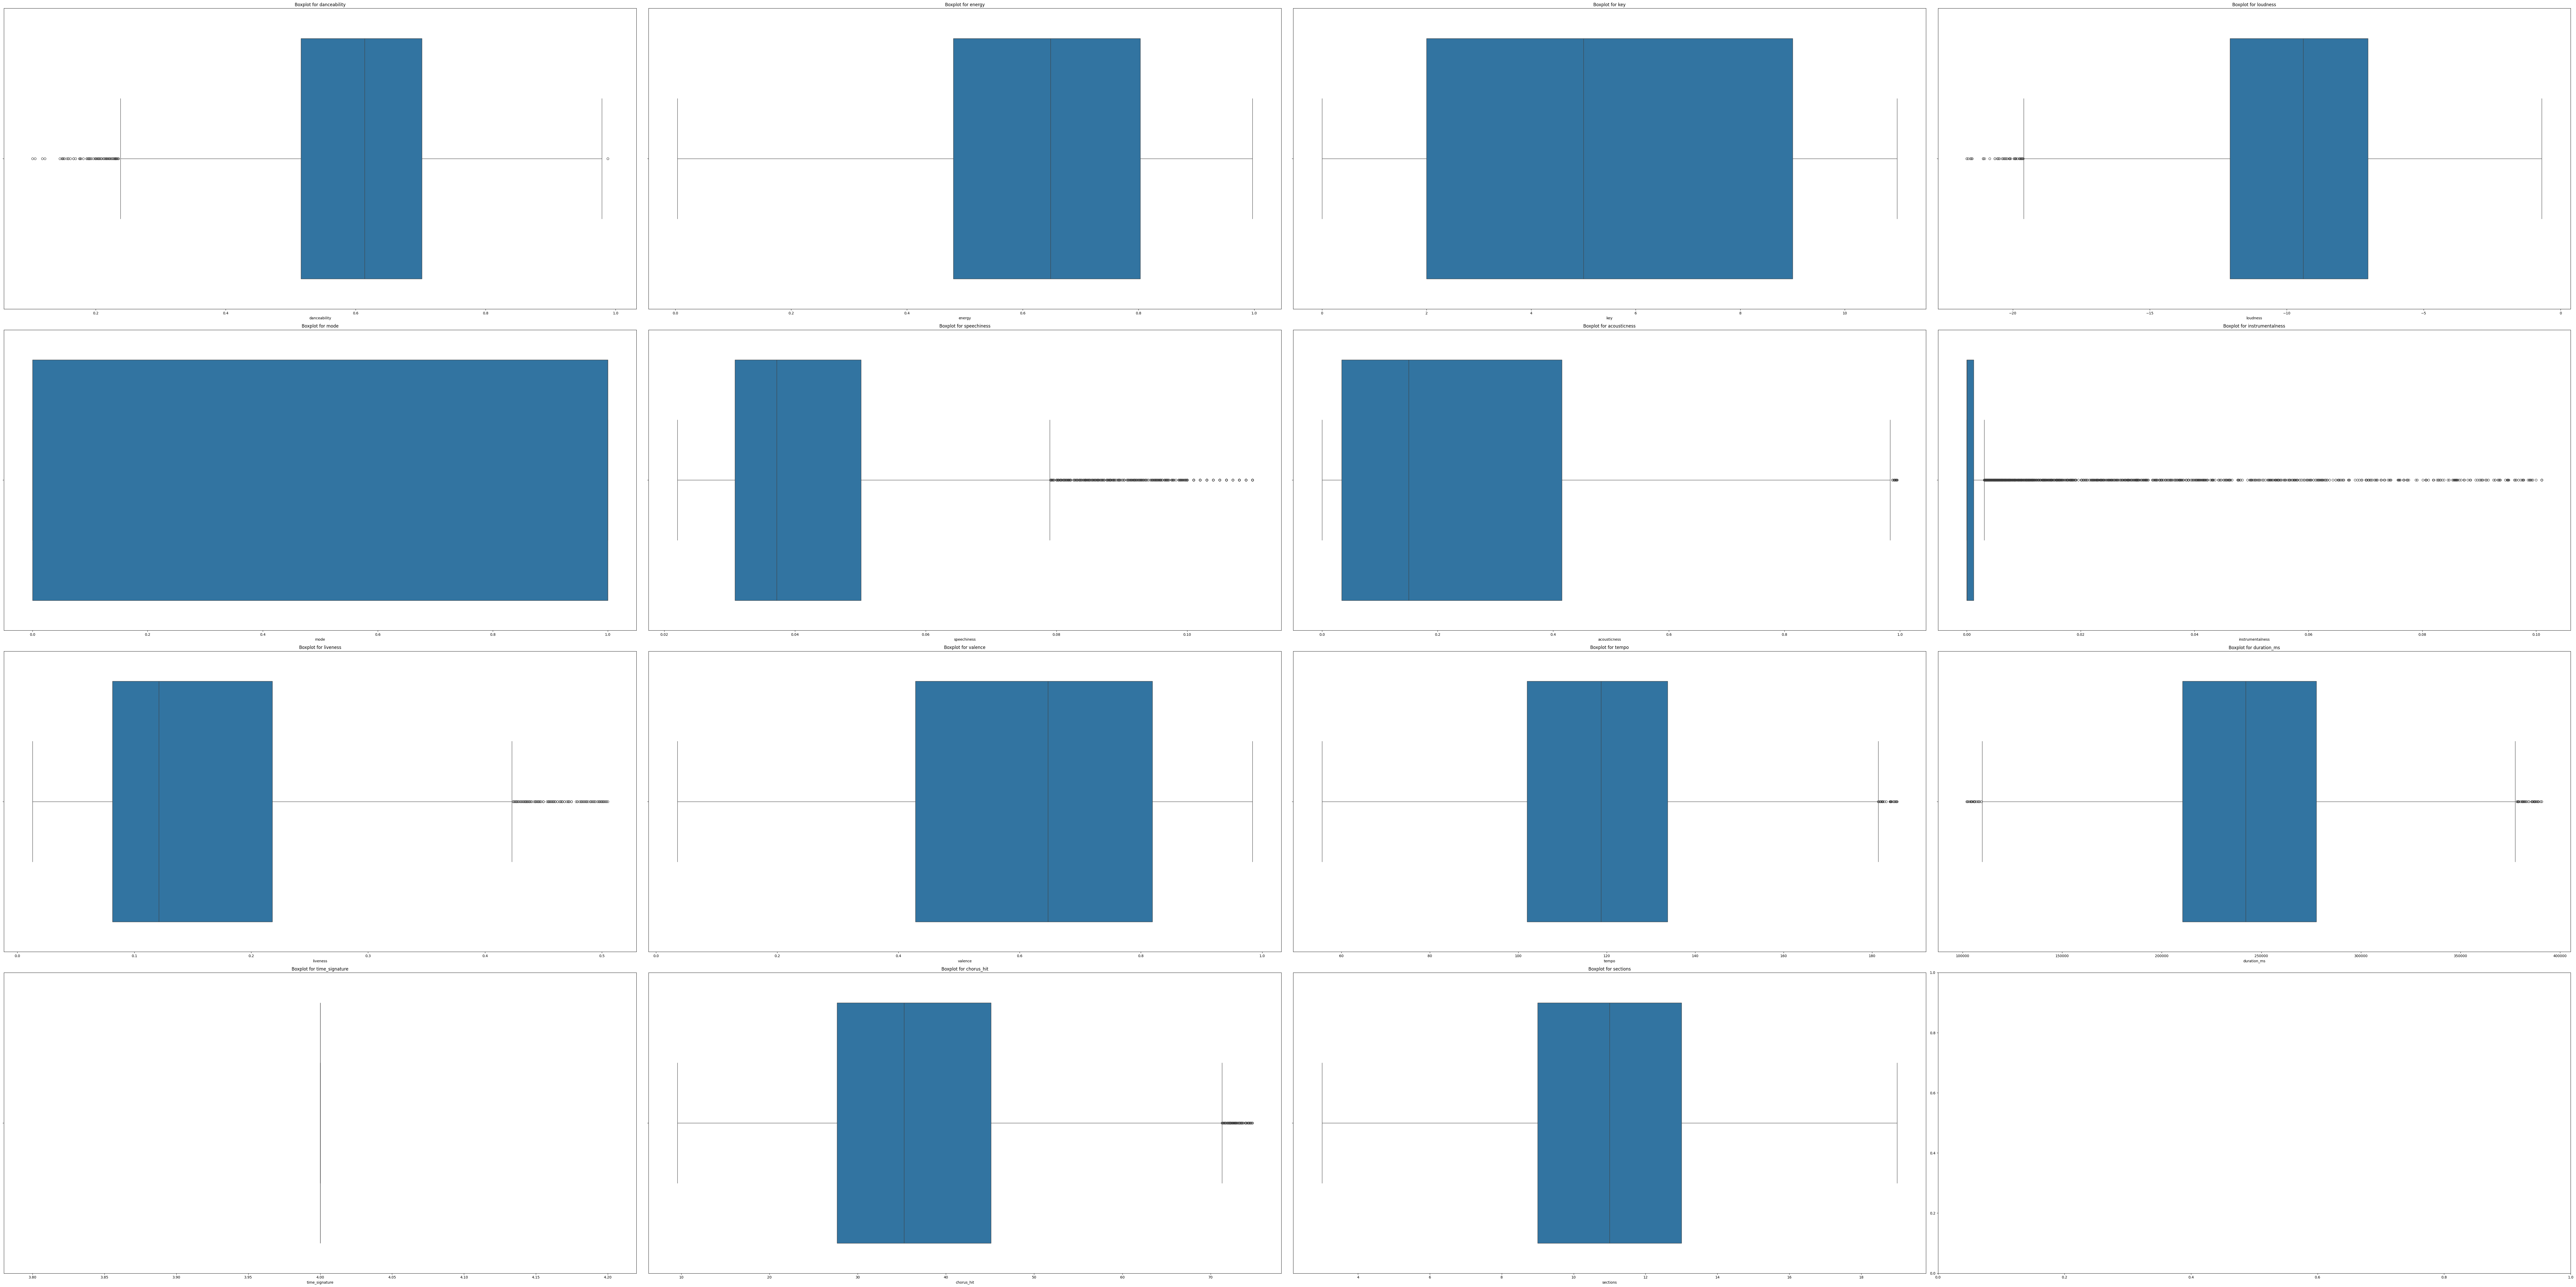

In [55]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(100, 50))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(x=main_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot for {col}")


plt.tight_layout()
plt.show()

## Data Normalization using MinMaxScalara

In [56]:
main_df.head()

track            artist                                   uri  \
0       Misty Roses   Astrud Gilberto  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm   
1        Never Ever        All Saints  spotify:track:5FTz9qQ94PyUHETyAyfYZN   
6    Baby-Baby-Baby               TLC  spotify:track:1zTuB57LYZa7xu7KUH8kF0   
7  I Missed The Bus        Kris Kross  spotify:track:793gh4IXh7mQsMBhvcJRlt   
8  The Comfort Zone  Vanessa Williams  spotify:track:7okbmgA8lRBGl5limZ7LFM   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.527   0.316    1   -15.769     1       0.0310       0.69300   
1         0.738   0.541    1    -5.485     1       0.0311       0.55900   
6         0.679   0.597   11    -8.601     0       0.0439       0.09130   
7         0.811   0.634    4   -10.408     0       0.0714       0.00469   
8         0.528   0.234    3   -15.784     1       0.0283       0.64100   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signature  \
0          0.006990    0.1680    0.543  116.211       158840               4   
1          0.000000    0.0492    0.309  134.187       387573               4   
6          0.000673    0.0487    0.900  184.174       315040               4   
7          0.009430    0.2240    0.273  107.915       179160               4   
8          0.000000    0.1830    0.191   95.911       218733               4   

   chorus_hit  sections  target  
0    53.89523         6       0  
1    32.16853        16       1  
6    20.93007        15       1  
7    54.78730         9       1  
8    46.33298        10       1

In [57]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6676 entries, 0 to 12427
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6676 non-null   object 
 1   artist            6676 non-null   object 
 2   uri               6676 non-null   object 
 3   danceability      6676 non-null   float64
 4   energy            6676 non-null   float64
 5   key               6676 non-null   int64  
 6   loudness          6676 non-null   float64
 7   mode              6676 non-null   int64  
 8   speechiness       6676 non-null   float64
 9   acousticness      6676 non-null   float64
 10  instrumentalness  6676 non-null   float64
 11  liveness          6676 non-null   float64
 12  valence           6676 non-null   float64
 13  tempo             6676 non-null   float64
 14  duration_ms       6676 non-null   int64  
 15  time_signature    6676 non-null   int64  
 16  chorus_hit        6676 non-null   float64
 17 

In [58]:
# from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Create a copy of the DataFrame to avoid modifying the original data
df_normalized = main_df.copy()

# Apply standard scaling to numerical features
scaler =  MinMaxScaler()
df_normalized[numerical_features] = scaler.fit_transform(main_df[numerical_features])

# Display the normalized DataFrame
print(df_normalized.head())



# from sklearn.preprocessing import MinMaxScaler

# # Assuming df is your DataFrame
# features_to_exclude = ['track', 'artist', 'uri', 'mode']  

# # Filter features by excluding specified columns
# numerical_features = [col for col in df.columns if col not in features_to_exclude and col != 'target']

# # Apply Min-Max scaling to numerical features
# scaler = MinMaxScaler()
# df[numerical_features] = scaler.fit_transform(df[numerical_features])

# # Display the normalized DataFrame
# print(df.head())

              track            artist                                   uri  \
0       Misty Roses   Astrud Gilberto  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm   
1        Never Ever        All Saints  spotify:track:5FTz9qQ94PyUHETyAyfYZN   
6    Baby-Baby-Baby               TLC  spotify:track:1zTuB57LYZa7xu7KUH8kF0   
7  I Missed The Bus        Kris Kross  spotify:track:793gh4IXh7mQsMBhvcJRlt   
8  The Comfort Zone  Vanessa Williams  spotify:track:7okbmgA8lRBGl5limZ7LFM   

   danceability    energy       key  loudness  mode  speechiness  \
0      0.479096  0.314731  0.090909  0.281551   1.0     0.102273   
1      0.717514  0.541141  0.090909  0.771312   1.0     0.103409   
6      0.650847  0.597492  1.000000  0.622916   0.0     0.248864   
7      0.800000  0.634724  0.363636  0.536861   0.0     0.561364   
8      0.480226  0.232217  0.272727  0.280836   1.0     0.071591   

   acousticness  instrumentalness  liveness   valence     tempo  duration_ms  \
0      0.696482          0.069208  0

## Regression


### 1. Energy vs Danceability


              track            artist                                   uri  \
0       Misty Roses   Astrud Gilberto  spotify:track:50RBM1j1Dw7WYmsGsWg9Tm   
1        Never Ever        All Saints  spotify:track:5FTz9qQ94PyUHETyAyfYZN   
6    Baby-Baby-Baby               TLC  spotify:track:1zTuB57LYZa7xu7KUH8kF0   
7  I Missed The Bus        Kris Kross  spotify:track:793gh4IXh7mQsMBhvcJRlt   
8  The Comfort Zone  Vanessa Williams  spotify:track:7okbmgA8lRBGl5limZ7LFM   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.527   0.316    1   -15.769     1       0.0310       0.69300   
1         0.738   0.541    1    -5.485     1       0.0311       0.55900   
6         0.679   0.597   11    -8.601     0       0.0439       0.09130   
7         0.811   0.634    4   -10.408     0       0.0714       0.00469   
8         0.528   0.234    3   -15.784     1       0.0283       0.64100   

   instrumentalness  liveness  valence    tempo  duration_ms  time_signatu

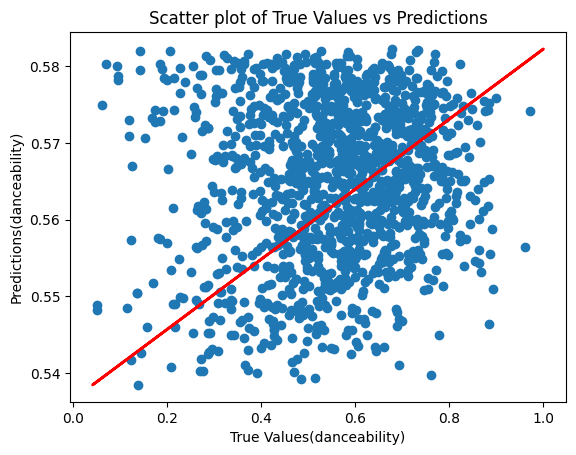

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

print(main_df.head())
# Assuming X contains your input features, and y contains the output values
X_train, X_test, y_train, y_test = train_test_split(df_normalized['energy'], df_normalized['danceability'], test_size=0.2, random_state=42)

# Reshape the input features
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Predict the output values for the test data
y_pred = model.predict(X_test)

# Calculate R2 score
r2 = r2_score(y_test, y_pred)
print(f'R2 Score: {r2}')

# Visualize results with scatter plot
plt.scatter(y_test, y_pred)
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(danceability)')
plt.ylabel('Predictions(danceability)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

### 2. Loudness vs Energy

In [70]:
# Assuming X contains your input features, and y contains the output values
print(main_df['energy'].head())
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df_normalized['energy'], df_normalized['loudness'], test_size=0.2, random_state=42)

0    0.316
1    0.541
6    0.597
7    0.634
8    0.234
Name: energy, dtype: float64


R2 Score: 0.07824445229284216


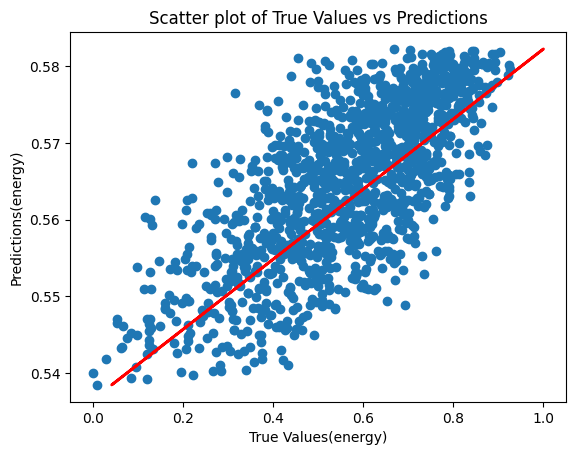

In [71]:
# Reshape the input features
X_train_2 = X_train_2.values.reshape(-1, 1)
X_test_2 = X_test_2.values.reshape(-1, 1)

# Initialize the linear regression model
model_2 = LinearRegression()

# Fit the model on the training data
model_2.fit(X_train_2, y_train_2)

# Predict the output values for the test data
y_pred_2 = model.predict(X_test_2)

# Calculate R2 score
r2_2 = r2_score(y_test_2, y_pred_2)
print(f'R2 Score: {r2_2}')

# Visualize results with scatter plot
plt.scatter(y_test_2, y_pred_2)
plt.plot(X_test_2, y_pred_2, color='red', linewidth=2, label='Regression Line')
plt.xlabel('True Values(energy)')
plt.ylabel('Predictions(energy)')
plt.title('Scatter plot of True Values vs Predictions')
plt.show()

In [62]:
# Assuming X contains your input features, and y contains the output values
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(main_df['valence'], main_df['danceability'], test_size=0.2, random_state=42)

In [63]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6676 entries, 0 to 12427
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track             6676 non-null   object 
 1   artist            6676 non-null   object 
 2   uri               6676 non-null   object 
 3   danceability      6676 non-null   float64
 4   energy            6676 non-null   float64
 5   key               6676 non-null   int64  
 6   loudness          6676 non-null   float64
 7   mode              6676 non-null   int64  
 8   speechiness       6676 non-null   float64
 9   acousticness      6676 non-null   float64
 10  instrumentalness  6676 non-null   float64
 11  liveness          6676 non-null   float64
 12  valence           6676 non-null   float64
 13  tempo             6676 non-null   float64
 14  duration_ms       6676 non-null   int64  
 15  time_signature    6676 non-null   int64  
 16  chorus_hit        6676 non-null   float64
 17 

### 3. Everything

In [73]:
# Add columns you want to exclude
features_to_exclude = ['track', 'artist','uri','mode']  

# Filter features by excluding specified columns
features = [col for col in df_normalized.columns if col not in features_to_exclude and col != 'target']

features = numerical_features  # Assuming the last column is the target variable

r2_scores = []

# Loop through all pairs of features
for i in range(len(features) - 1):
    for j in range(len(features)-1):
        if i != j:
            # Select the pair of features
            current_features = df_normalized[features[i]]

            # Split the data
            print(df_normalized[features[i]].shape)
            print(df_normalized[features[j]].shape)
            
            
            X_train, X_test, y_train, y_test = train_test_split(current_features, df_normalized[features[j]], test_size=0.2, random_state=42)

            # Reshape the input features
            X_train = X_train.values.reshape(-1, 1)
            X_test = X_test.values.reshape(-1, 1)
            
            # Initialize the linear regression model
            model = LinearRegression()

            # Fit the model on the training data
            model.fit(X_train, y_train)

            # Predict the output values for the test data
            y_pred = model.predict(X_test)

            # Calculate R2 score
            r2 = r2_score(y_test, y_pred)
            # Visualize results with scatter plot and regression line
#             plt.scatter(X_test[:, 0], y_test, color='blue', label='True Values')
#             plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted Values')
#             plt.xlabel(features[i])
#             plt.ylabel(features[j])
#             plt.title(f'Scatter plot of {features[i]} vs {features[j]} with Regression Line')
#             plt.legend()
#             plt.show()
            
            
            r2_scores.append(r2)
            print(f'R2 Score for {features[i]} and {features[j]}: {r2}')
    print("-------------------------------------------------------------")
        
            
print("\nMaximum R2 score is:",max(r2_scores))


(6676,)
(6676,)
R2 Score for danceability and energy: 0.006969233347503545
(6676,)
(6676,)
R2 Score for danceability and key: -0.0005228093643150356
(6676,)
(6676,)
R2 Score for danceability and loudness: -0.0009344664759565191
(6676,)
(6676,)
R2 Score for danceability and mode: 0.009803868300612528
(6676,)
(6676,)
R2 Score for danceability and speechiness: 0.004150299592195261
(6676,)
(6676,)
R2 Score for danceability and acousticness: 0.02200764171728864
(6676,)
(6676,)
R2 Score for danceability and instrumentalness: 3.9527297716057674e-06
(6676,)
(6676,)
R2 Score for danceability and liveness: 0.019265318356080807
(6676,)
(6676,)
R2 Score for danceability and valence: 0.291553191083333
(6676,)
(6676,)
R2 Score for danceability and tempo: 0.0020466153182751023
(6676,)
(6676,)
R2 Score for danceability and duration_ms: 0.012054985339714608
(6676,)
(6676,)
R2 Score for danceability and time_signature: 1.0
(6676,)
(6676,)
R2 Score for danceability and chorus_hit: -0.0007730667114762557


In [28]:
features = main_df.columns[:-1]